Data Cleaning and EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
# The data is taken from: 
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview
houses_data = r"C:\Users\sveta\Desktop\Python for GitHub\Machine Learning\houses_dataset.csv"
house_price = pd.read_csv(houses_data, header=0)
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Target: 'SalePrice'
# Features: 79 columns (excludes Id)
# There are 1460 observations in the data
# There are some columns with null values
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Inspecting null values
# .isnull() only detects the python-native null values
null_values = house_price.isnull()
null_values.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [6]:
# Let's see what columns have most null values
for c in null_values.columns.values.tolist():
    print(c)
    print (null_values[c].value_counts())
    print("")

Id
False    1460
Name: Id, dtype: int64

MSSubClass
False    1460
Name: MSSubClass, dtype: int64

MSZoning
False    1460
Name: MSZoning, dtype: int64

LotFrontage
False    1201
True      259
Name: LotFrontage, dtype: int64

LotArea
False    1460
Name: LotArea, dtype: int64

Street
False    1460
Name: Street, dtype: int64

Alley
True     1369
False      91
Name: Alley, dtype: int64

LotShape
False    1460
Name: LotShape, dtype: int64

LandContour
False    1460
Name: LandContour, dtype: int64

Utilities
False    1460
Name: Utilities, dtype: int64

LotConfig
False    1460
Name: LotConfig, dtype: int64

LandSlope
False    1460
Name: LandSlope, dtype: int64

Neighborhood
False    1460
Name: Neighborhood, dtype: int64

Condition1
False    1460
Name: Condition1, dtype: int64

Condition2
False    1460
Name: Condition2, dtype: int64

BldgType
False    1460
Name: BldgType, dtype: int64

HouseStyle
False    1460
Name: HouseStyle, dtype: int64

OverallQual
False    1460
Name: OverallQual, dtype: i

In [7]:
# Alternatively, we can calculate how many features in total have null values
house_price.isnull().any().sum()

19

In [21]:
# We need to decide what to do with missing values
# Sometimes features can be dropped but we have to be careful with it
# As a rule of thumb, we can drop the features with more than 5% or 10% of missing values
# Let's follow this rule and drop the columns with missing values more than 5%
# I use .head() and .tail() to insepct all the results
percent_missing = house_price.isnull().sum() * 100 / len(house_price)
percent_missing.head(50)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage     17.739726
LotArea          0.000000
Street           0.000000
Alley           93.767123
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.547945
MasVnrArea       0.547945
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinSF1       0.000000
BsmtFinType2     2.602740
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

In [23]:
# Drop the columns where % of missing values is more than 5%
house_price.drop(['LotFrontage', 'Alley', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

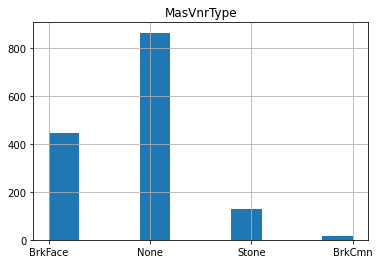

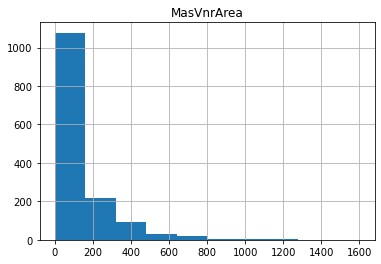

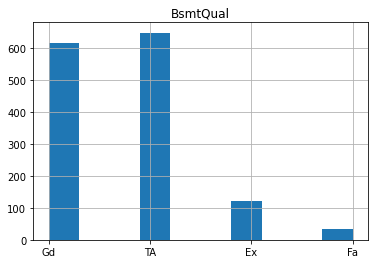

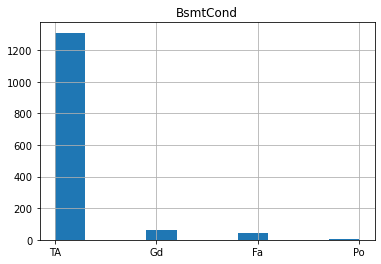

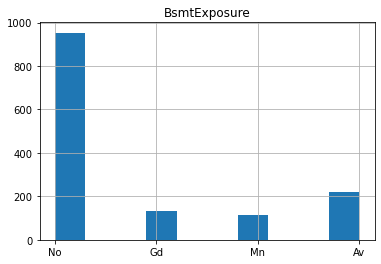

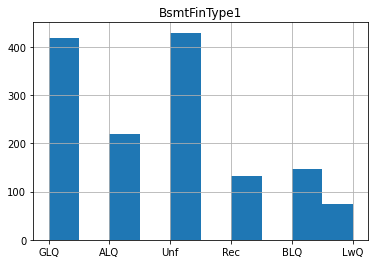

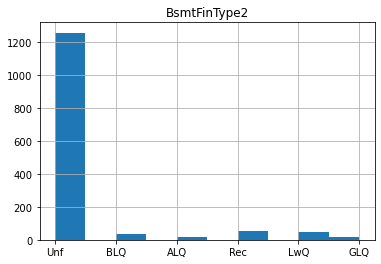

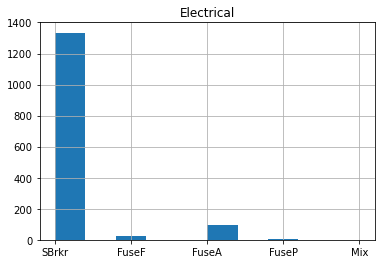

In [24]:
# The columns that have less than 5% of missing values have different types of values
# We can replace null values with mean or median, if values in a column are numerical
# Whether we choose mean or median depends on how skewed the distribution is
# We can replace null values with most frequent values, if values in a column are categorical
# Sometimes, we can also assign dummy variables
# In this case, we will be able to use our dummy variables later in Data Analysis
# Draw a histogram to see the values' distribution for each column
null_columns = ['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical']
for c in null_columns:
    house_price[c].hist()
    plt.title(c)
    plt.show()

In [25]:
# We can also return most frequent values using .idxmax()
house_price[['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical']].value_counts().idxmax()

('None', 0.0, 'TA', 'TA', 'No', 'Unf', 'Unf', 'SBrkr')

In [26]:
# We use .dtypes to check data types
house_price[['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical']].dtypes

MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
dtype: object

In [27]:
# We replace the missing values in all columns but 'MasVnrArea' with most frequent values
house_price['MasVnrType'].replace(np.nan, 'None', inplace=True)
house_price['BsmtQual'].replace(np.nan, 'TA', inplace=True)
house_price['BsmtCond'].replace(np.nan, 'TA', inplace=True)
house_price['BsmtExposure'].replace(np.nan, 'No', inplace=True)
house_price['BsmtFinType1'].replace(np.nan, 'Unf', inplace=True)
house_price['BsmtFinType2'].replace(np.nan, 'Unf', inplace=True)
house_price['Electrical'].replace(np.nan, 'SBrkr', inplace=True)

In [28]:
# Let's check if everything has been replaced correctly
house_price[['Electrical', 'BsmtCond', 'MasVnrType', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].isnull().sum()

Electrical      0
BsmtCond        0
MasVnrType      0
BsmtQual        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

In [29]:
# The value disribution of 'MasVnrArea' is skewed
# We replace null values with a median
median= house_price['MasVnrArea'].median(axis = 0)
print('Median for MasVnrArea:', median)

Median for MasVnrArea: 0.0


In [30]:
# The histogram agrees with the median value equal to 0 in that column
house_price['MasVnrArea'].replace(np.nan, 0, inplace=True)

In [31]:
# Run a quick check
house_price['MasVnrArea'].isnull().sum()

0

In [32]:
# Many of our columns contain non-numerical values
# Sometimes, it is useful to assign dummy variables to the non-numerical values
# For example, let's find out the values in 'Street' column
house_price['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [34]:
# We assign dummy variables
indicator_var = pd.get_dummies(house_price['Street'])
print(indicator_var)

      Grvl  Pave
0        0     1
1        0     1
2        0     1
3        0     1
4        0     1
...    ...   ...
1455     0     1
1456     0     1
1457     0     1
1458     0     1
1459     0     1

[1460 rows x 2 columns]


In [35]:
# We rename the columns
indicator_var.rename(columns = {'Grvl': 'Street_Grvl', 'Pave': 'Street_Pave'}, inplace=True)

In [36]:
# We merge the table with the new columns
# We can drop 'Street' column or keep it; I will keep it
house_price = pd.concat([house_price, indicator_var], axis = 1)

In [37]:
# Our new columns have been successfully added at the end of the table
house_price.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Street_Grvl,Street_Pave
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2,2008,WD,Normal,208500,0,1
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,5,2007,WD,Normal,181500,0,1
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,9,2008,WD,Normal,223500,0,1
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,2,2006,WD,Abnorml,140000,0,1
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,12,2008,WD,Normal,250000,0,1


Text(0.5, 1.0, 'Overall Quality')

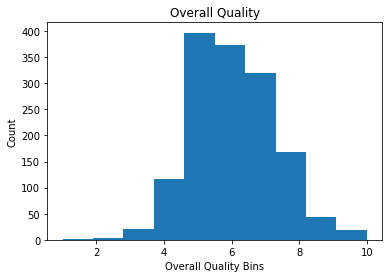

In [38]:
# Sometimes we might want to group continuous values into smaller number of 'bins'
# Binning is a form of quantization and is often used while data is being pre-processed
# Let's bin the values from 'OverallQual' column
# We will also plot the histogram to visualize the distiburtion
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(house_price['OverallQual'])
# set x, y, and title
plt.pyplot.xlabel('Overall Quality Bins')
plt.pyplot.ylabel('Count')
plt.pyplot.title('Overall Quality')

In [39]:
# if I choose to have 3 bins, I need 4 dividers
bins = np.linspace(min(house_price['OverallQual']), max(house_price['OverallQual']), 4)
bins

array([ 1.,  4.,  7., 10.])

In [40]:
# We name the groups
group_names = ['Low', 'Medium', 'High']

In [41]:
house_price['OverallQual_binned'] = pd.cut(house_price['OverallQual'], bins, labels = group_names, include_lowest = True)

In [43]:
# Each score in 'OverallQual' is assigned to a certain group
house_price[['OverallQual', 'OverallQual_binned']].head(20)

,OverallQual,OverallQual_binned
0,7,Medium
1,6,Medium
2,7,Medium
3,7,Medium
4,8,High
5,5,Medium
6,8,High
7,7,Medium
8,7,Medium
9,5,Medium


In [44]:
# We can calculate how much is in each bin
house_price['OverallQual_binned'].value_counts()

Medium    1090
High       229
Low        141
Name: OverallQual_binned, dtype: int64

Text(0.5, 1.0, 'OverallQual Bins Distribution')

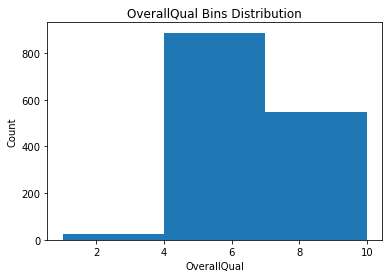

In [45]:
# We draw a histogramm to visualize the distribution
# There are 3 bins
# Intervals: 1 - 4, 4 - 7, 7 - 10
# As the result of binning, we can observe how insignificant the amount of values in 1 - 4 interval
# Mots of the values belong to 4 - 7 interval in 'Overallqual' column
plt.pyplot.hist(house_price['OverallQual'], bins = 3)
plt.pyplot.xlabel('OverallQual')
plt.pyplot.ylabel('Count')
plt.pyplot.title('OverallQual Bins Distribution')

In [46]:
# we export the csv file
#house_price.to_csv(r'C:\Users\sveta\Desktop\Python for GitHub\Machine Learning\houses_dataset_edited.csv')

In [54]:
# We can also notice that there is a huge range difference between 'SalePrice' and 'OverallQual'
# That might be important when we do a linear regression analysis
# Let's create new columns for the normalized values
# We use sklearn.preprocessing.normalize
from sklearn import preprocessing

In [48]:
house_price['Normalized_OverallQual'] = preprocessing.normalize(house_price[['OverallQual']], axis=0)
house_price['Normalized_SalePrice'] = preprocessing.normalize(house_price[['SalePrice']], axis=0)
house_price.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Street_Grvl,Street_Pave,OverallQual_binned,Normalized_OverallQual,Normalized_SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2,2008,WD,Normal,208500,0,1,Medium,0.029293,0.027617
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,5,2007,WD,Normal,181500,0,1,Medium,0.025108,0.024041
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,9,2008,WD,Normal,223500,0,1,Medium,0.029293,0.029604
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,2,2006,WD,Abnorml,140000,0,1,Medium,0.029293,0.018544
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,12,2008,WD,Normal,250000,0,1,High,0.033477,0.033114


In [55]:
# We export the csv file for further Statistical Analysis and Model Development
house_price.to_csv(r'C:\Users\sveta\Desktop\Python for GitHub\Machine Learning\houses_dataset_edited.csv')